## 3. GridSearch

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scipy.io import loadmat
import numpy as np

fig_size = (12, 8)
fig_dpi = 100

加载数据，查看形状

In [10]:
data =loadmat('./data/ex6data3.mat')
train_x = data.get('X')
train_y = data.get('y')
val_x = data.get('Xval')
val_y = data.get('yval')
train_x.shape, val_x.shape

((211, 2), (200, 2))

训练集可视化

In [ ]:
plt.figure(figsize=fig_size, dpi=fig_dpi)
positive_data_idx= np.where(train_y[:,0]==1)
positive_data_tr = train_x[positive_data_idx]
negative_data_idx= np.where(train_y[:, 0] == 0)
negative_data_tr = train_x[negative_data_idx]
plt.scatter(x=positive_data_tr[:, 0], y=positive_data_tr[:, 1], s=10, color="red",label="positive")
plt.scatter(x=negative_data_tr[:, 0], y=negative_data_tr[:, 1], s=10, label="negative")
plt.title("Train Dataset")
plt.legend(loc=2)
plt.show()

验证集可视化

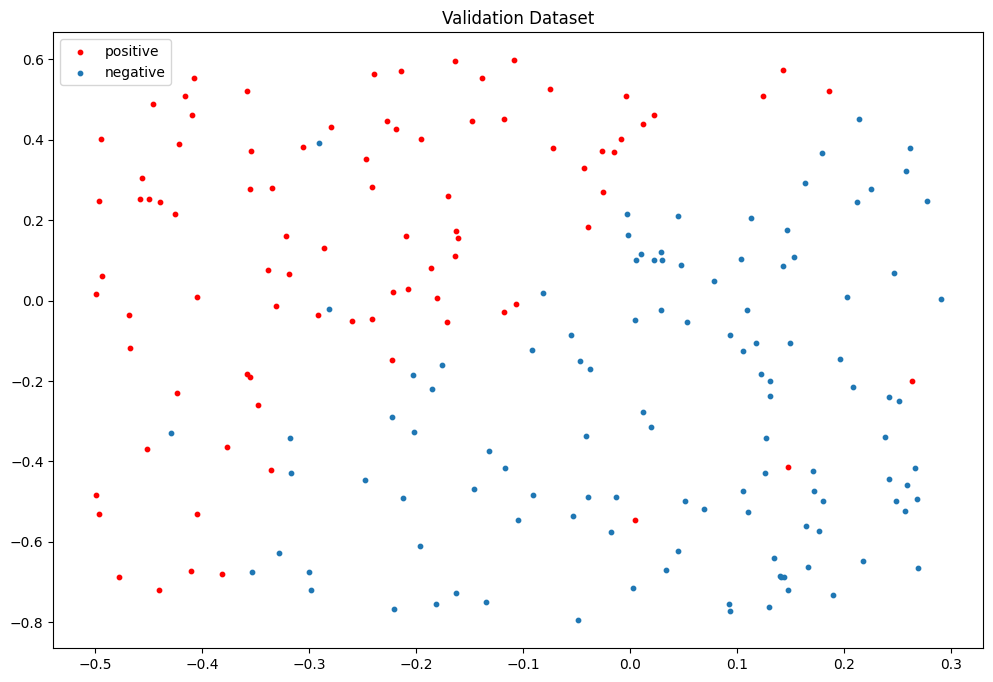

In [12]:
plt.figure(figsize=fig_size, dpi=fig_dpi)
positive_data_idx= np.where(val_y[:,0]==1)
positive_data_val = val_x[positive_data_idx]
negative_data_idx= np.where(val_y[:, 0] == 0)
negative_data_val = val_x[negative_data_idx]
plt.scatter(x=positive_data_val[:, 0], y=positive_data_val[:, 1], s=10, color="red",label="positive")
plt.scatter(x=negative_data_val[:, 0], y=negative_data_val[:, 1], s=10, label="negative")
plt.title("Validation Dataset")
plt.legend(loc=2)
plt.show()

设定Grid

In [13]:
candidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
parameters_grid = np.array([[c, gamma] for c in candidate for gamma in candidate])
parameters_grid

array([[1.e-02, 1.e-02],
       [1.e-02, 3.e-02],
       [1.e-02, 1.e-01],
       [1.e-02, 3.e-01],
       [1.e-02, 1.e+00],
       [1.e-02, 3.e+00],
       [1.e-02, 1.e+01],
       [1.e-02, 3.e+01],
       [1.e-02, 1.e+02],
       [3.e-02, 1.e-02],
       [3.e-02, 3.e-02],
       [3.e-02, 1.e-01],
       [3.e-02, 3.e-01],
       [3.e-02, 1.e+00],
       [3.e-02, 3.e+00],
       [3.e-02, 1.e+01],
       [3.e-02, 3.e+01],
       [3.e-02, 1.e+02],
       [1.e-01, 1.e-02],
       [1.e-01, 3.e-02],
       [1.e-01, 1.e-01],
       [1.e-01, 3.e-01],
       [1.e-01, 1.e+00],
       [1.e-01, 3.e+00],
       [1.e-01, 1.e+01],
       [1.e-01, 3.e+01],
       [1.e-01, 1.e+02],
       [3.e-01, 1.e-02],
       [3.e-01, 3.e-02],
       [3.e-01, 1.e-01],
       [3.e-01, 3.e-01],
       [3.e-01, 1.e+00],
       [3.e-01, 3.e+00],
       [3.e-01, 1.e+01],
       [3.e-01, 3.e+01],
       [3.e-01, 1.e+02],
       [1.e+00, 1.e-02],
       [1.e+00, 3.e-02],
       [1.e+00, 1.e-01],
       [1.e+00, 3.e-01],


实现GridSearch，在训练集上进行k-折交叉验证，确定最佳参数

In [102]:
score_list = []
from sklearn.svm import SVC
from SVM import show_boundary
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for param in parameters_grid:
    score = []
    for tr_idx, test_idx in kf.split(train_x,train_y):
        tr_x,tr_y = train_x[tr_idx], train_y[tr_idx]
        test_x, test_y = train_x[test_idx], train_y[test_idx]

        svc = SVC(C=param[0], gamma=param[1], probability=True)
        svc.fit(tr_x, tr_y.ravel())
        score.append(svc.score(test_x, test_y.ravel()))
    score_list.append(score)

score_arr = np.array(score_list).mean(axis=1)
best_param = parameters_grid[np.argmax(score_arr)]
best_score = score_arr.max()
param_dict = {'C': best_param[0], 'gamma': best_param[1]}
best_svc = SVC(probability=True)
best_svc.set_params(**param_dict)
best_svc.fit(train_x,train_y.ravel())
print("Best parameters C={}, gamma={}, with average precision of {:.4f}".format(best_param[0], best_param[1], best_score))

Best parameters C=30.0, gamma=3.0, with average precision of 0.9244


Sklearn库函数实现

In [108]:
svc = SVC(probability=True)
parameters = {'C': candidate, 'gamma': candidate}
# default 5-fold
clf = GridSearchCV(svc, parameters, n_jobs=-1)
clf.fit(train_x,train_y.ravel())
print("SKlearn result: C={}, gamma={}".format(clf.best_params_.get('C'), clf.best_params_.get('gamma')))

SKlearn result: C=30, gamma=3


决策边界可视化

In [ ]:
show_boundary(best_svc, scale=np.array([[-0.5,0.3],[-0.8,0.8]]), positive_data=positive_data_tr,negative_data=negative_data_tr,term=1e-5,fig_dpi=fig_dpi,fig_size=fig_size)

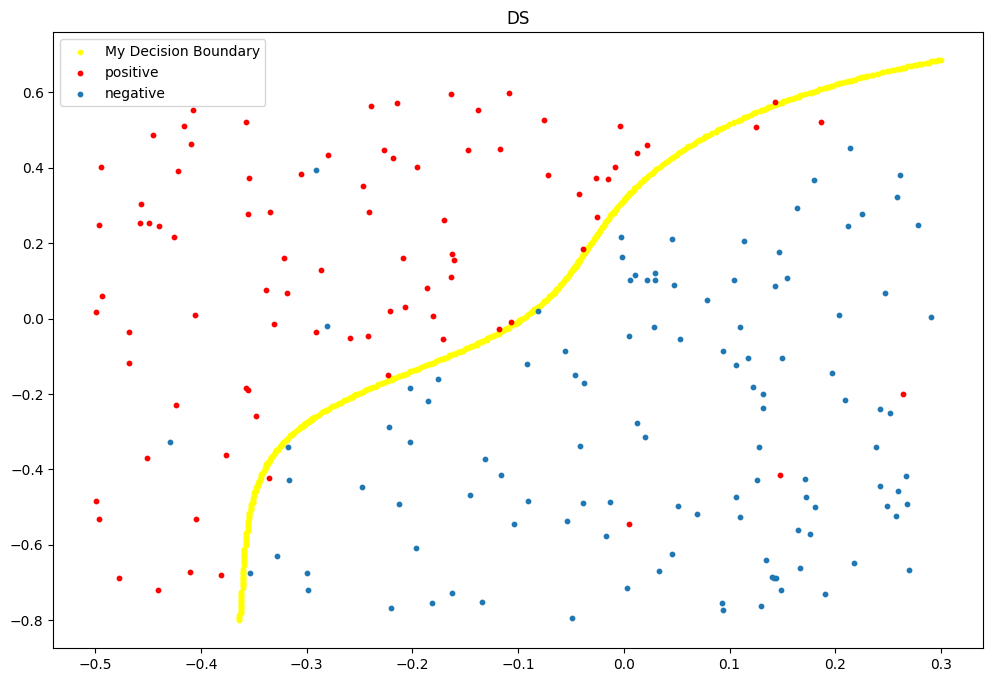

In [104]:
show_boundary(best_svc, scale=np.array([[-0.5,0.3],[-0.8,0.8]]), positive_data=positive_data_val,negative_data=negative_data_val,term=1e-5,fig_dpi=fig_dpi,fig_size=fig_size)